In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
sum_path = '../summaries/allSixMonths_shear/'

def getSlices(kind, pname, size, sum_path):
    f = sum_path + f'/{pname}_polarSummary_{kind}.p'
    allSlices = pickle.load(open(f, 'rb'))

    indSlice = allSlices[1][f'kkSlice_{size}']
    bins = allSlices[1][f'kkSliceBins_{size}']

    stackSlice = [np.array(allSlices[s][f'kkSlice_{size}']) for s in allSlices.keys()]
      
    return np.array(stackSlice).sum(axis=0) / len(allSlices), indSlice, bins

k = 'actualRand'
xiPlus_big = getSlices(k, 'shearPlus', 'big', sum_path)
xiPlus_small = getSlices(k, 'shearPlus', 'small', sum_path)
xiMinus_big = getSlices(k, 'shearMinus', 'big', sum_path)
xiMinus_small = getSlices(k, 'shearMinus', 'small', sum_path)

xiMinus_small_rand = getSlices('rand', 'shearMinus', 'small', sum_path)
xiMinus_big_rand = getSlices('rand', 'shearMinus', 'big', sum_path)

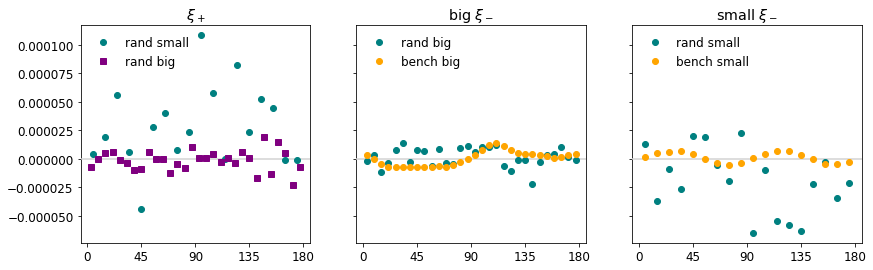

In [4]:
f, a = plt.subplots(1,3, sharey=True, sharex=True, figsize=(14,4))
plt.rcParams['font.size'] = 12

nS = len(xiPlus_small[2])
nB = len(xiPlus_big[2])

[ax.axhline(0, color='lightgrey', zorder=3) for ax in a]
a[0].set_xticks([0,45,90,135,180])

a[0].plot(xiPlus_small[-1], xiPlus_small[0], 'o', color='teal', zorder=4, label='rand small');
a[0].plot(xiPlus_big[-1], xiPlus_big[0], 's', color='purple', zorder=4, label='rand big')
a[0].legend(frameon=False, loc='upper left')
a[0].set_title(r'$\xi_+$');

a[1].plot(xiMinus_big[-1], xiMinus_big[0], 'o', color='teal', zorder=4, label='rand big')
a[1].plot(xiMinus_big_rand[-1], xiMinus_big_rand[0], 'o', color='orange', zorder=4, label='bench big')
a[1].legend(frameon=False, loc='upper left')
a[1].set_title(r'big $\xi_-$');

a[2].plot(xiMinus_small[-1], xiMinus_small[0], 'o', color='teal', zorder=4, label='rand small');
a[2].plot(xiMinus_small_rand[-1], xiMinus_small_rand[0], 'o', color='orange', zorder=4, label='bench small');
a[2].legend(frameon=False, loc='upper left')
a[2].set_title(r'small $\xi_-$');